<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Julia lab - unconstrained optimization </font></p>

**<p><font size="5">  Students NAME and FAMILY NAME: QUINTEROS, Santiago and PISTONE WATHELET, Sofia. </font></p>**
</p></br>
</p>
</CENTER>

----------------------------

}In this lab, we want first to test the benefit of backtracking against constant stepsize for gradient or newton algorithms. Then, we will consider the behavior of conjugate-gradient and Polack-Ribière technique that work without knowledge of the Hessian matrix of the function to be optimized.

## <span style="color:#00B8DE"> I - Function plot </span>

**1)** Let us consider the function $f(x,y)=[(x-2)\sin(y-1)]^2+x^2+y^2$. 
Visualize this function on the square with vertices $(\pm 3,\pm 3)$.

## <span style="color:#00B8DE"> II - Backtracking </span>

**2)** Testing the benefit of backtracking. Calculate gradient of this function and implement gradient algorithm
for constant stepsize equal to .1 and then .01 and using backtracking. Compare the numbers of iterations necessary for convergence with initialization at point $(−4, -2)$ and residual error for the distance to the optimum smaller than $10^{−3}$.

## <span style="color:#00B8DE"> III - Gradient and Newton </span>
**3)** Implement Newton algorithm with backtracking to minimize $f(x,y)$ and compare results to gradient algorithm with backtracking.

## <span style="color:#00B8DE"> IV - Conjugate gradient </span>
**4)** Implement the conjugate-gradient algorithm and test it on a simple quadratic function $p({\bf x})=\frac 1 2 {\bf x^TAx}-{\bf x^Tb}$ with ${\bf A} = [1\; 0;0\; 5]$ and ${\bf b}=[1; 1]$.How many steps are required for convergence ? 

**5)** Consider a larger problem where 

        n = 10  # 100
        
        a = randn(n,n)
        
        A = a'*a + diagm(0=>ones(n)) # A = a'*a
        
        b = randn(n)

For $n=10,100$, check the influence of the condition number of ${\bf A}$ by adding or removing term **diagm(0=>ones(n))**.

## <span style="color:#00B8DE"> V - Polak-Ribière </span>
**6)** Considering again function, compare the performance of gradientand Polack-Ribiere algorithms with backtracking and initialization at point $(−4, -2)$. 

## <span style="color:#00B8DE"> VI - Changing initialization </span>
**7)** What occurs with these algorithms when changing intilialization to point $(-5,-0.5)$ ? Explain.


## <span style="color:#00B8DE">References (Wikipedia/book)</span>
> - [Gradient algorithm](http://en.wikipedia.org/wiki/Gradient_descent)
> - [Nonlinear conjugate gradient method and Polack-Ribière algoritm](http://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method)
> - [Backtracking](http://www.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)  (p.464)


---------
### <span style="color:#00B8DE"> I - Function plot </span>


In [48]:
using Plots
using LinearAlgebra: norm

In [49]:
function f(x::Vector) 
    return ((x[1]-2)*sin(x[2]-1))^2 + x[1]^2 + x[2]^2
end

function ∇f(x::Vector)  
    return [ 2 * x[1] + 2 * sin(x[2]-1)^2 * (x[1]-2); 2 * x[2] + 2 * (x[1]-2)^2 * cos(x[2]-1) * sin(x[2]-1)]
end

∇f (generic function with 1 method)

In [50]:
opt = [0.09172811859570773;0.7789586896619789]
println("min f(x,y) = $(f(opt))")
println("optimum at (x*,y*) = ($(opt[1]),$(opt[2]))")

min f(x,y) = 0.7902328773913346
optimum at (x*,y*) = (0.09172811859570773,0.7789586896619789)


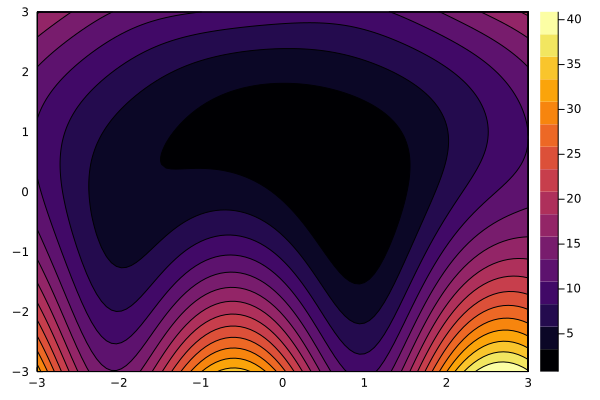

In [51]:
# For options of Plots.jl, see https://docs.juliaplots.org/latest/

image_size = (100, 100)
x_range = LinRange(-3, 3, image_size[1])
y_range = LinRange(-3, 3, image_size[2])

z = zeros(image_size)

for i in 1:image_size[1]  
    for j in 1:image_size[2]  
        z[i, j] = f([x_range[i]; y_range[j]])
    end
end

contourf(x_range, y_range, z)

### <span style="color:#00B8DE"> II - Backtracking </span>

In [52]:
# Gradient algorithm
# constant stepsize
# We define a function for this method where alpha is the step_size:

function grad_descent(init, gradient, precision, max_iter, opt, alpha)
    n = 0 # counter
    pt = init
    result = pt
    
    while norm(pt-opt)>precision&&n< max_iter
        pt = pt - alpha * gradient(pt)
        n += 1
        
        result  = [result pt]
        
    end
    return pt, n, result
    
end

precision = 1.e-3
max_iter  = 1e4
init      = [-4, -2]

# We test to see if the function works


print("Original value \n",opt)
# Test with alpha = 0.1
step_size = 0.1

pt, nb_const, resu_const = grad_descent(init, ∇f, precision, max_iter, opt, step_size)

print("\n For 0.1 \n",pt) 
print("\n",nb_const)
# Test with alpha = 0.001
step_size = 0.001

pt, nb_const, resu_const = grad_descent(init, ∇f, precision, max_iter, opt, step_size)

print("\n For 0.001 \n", pt) 
print("\n",nb_const)
# Test with alpha = 0.01
step_size = 0.01

pt, nb_const, resu_const = grad_descent(init, ∇f, precision, max_iter, opt, step_size)

print("\n For 0.01 \n", pt) 
print("\n",nb_const)



Original value 
[0.09172811859570773, 0.7789586896619789]
 For 0.1 
[0.0908606062242275, 0.7791645588104501]
38
 For 0.001 
[0.09269940668972843, 0.7787277574877246]
8263
 For 0.01 
[0.0926962855811992, 0.7787285014248211]
823

With this results we can conclude that the value of alpha will affect the amount of iterations to converge, affecting also the amount of time needed. There is a point where the value to which it converges does not change significally, making it abusrd to continue to decrease the alpha. 

In [53]:
# Backtracking

"""
bactracking: 
see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
IN:
---
x: initial point
f, ∇f: function to be minimized and its gradient
d: searc direction
OUT:
----
y: final point
n: number of loops
"""

function backtracking(x,f,∇f,d)
# x[1]=x x[2]=y
    a = 0.25 #is a value between (0 and 0.5)
    b = 0.5  #is a value between (0 and 1)
    r = 1
    n = 0

    
    while f( x+r * d) > f(x) + a * r * (transpose(d) * ∇f(x))
        r = b * r
        n += 1
    end
    
    return r, n
end

backtracking (generic function with 1 method)

In [54]:
# Gradient algorithm
# with backtracking
#-------------------
function grad_descent_backtracking(init, f, ∇f, precision, max_iter, opt)
    nb_iter_grad = 0 # number of loops
    nb_loops_grad = 0 # number of inner loops count for backtracking
    pt = init 
    result = pt
    
    while norm(pt-opt)>precision && nb_iter_grad<max_iter
        d = -∇f(pt)
        r,n = backtracking(pt,f,∇f,d)
        pt += r * d

        result      = [result pt]
        nb_loops_grad += n
        nb_iter_grad  += 1
    end
    
    return pt, nb_iter_grad, nb_loops_grad, result
end

pt, nb_iter_grad, nb_loops_grad, resu_grad = grad_descent_backtracking(init, f, ∇f, precision, max_iter, opt)


print("Original value \n",opt)
print("\n Gradient algorithm with backtracking \n", pt) 
print("\n number of loops \n ",nb_iter_grad, " \n number of loops count for backtracking \n ",nb_loops_grad)

Original value 
[0.09172811859570773, 0.7789586896619789]
 Gradient algorithm with backtracking 
[0.09258477266205511, 0.7789968966707885]
 number of loops 
 8 
 number of loops count for backtracking 
 20

In [55]:
println("Error with constant stepsize: $(norm(resu_const[:,end]-opt))")
println("Number of iterations with constant stepsize: $nb_const\n\n")
    
println("Error with backtracking: $(norm(resu_grad[:,end]-opt))")
println("Number of iterations for backtracking= $nb_iter_grad")
println("Number of inner loops for backtracking = $nb_loops_grad")

Error with constant stepsize: 0.000995155232273572
Number of iterations with constant stepsize: 823


Error with backtracking: 0.0008575056646528278
Number of iterations for backtracking= 8
Number of inner loops for backtracking = 20


# The conclusion we could make with this results are regarding. 

- The error comparison: Backtracking achieved a lower error (0.0008575056646528278) compared to constant stepsize (0.000995155232273572), indicating better optimization performance.
  
- The Iterations: Backtracking required significantly fewer iteration s0 iterations) to converge compared to constant stepsiz e823 iterations), highlighting its faster convergenc.

-  The Inner Loop Iterations: Backtracking involves inner loop iterations (20 in this case), which can be regulated using parameters like alpha and b
  
- The parameter tuningning: Fine-tuning alpha and beta in the backtracking algorithm is crucial for balancing convergence speed and inner loo.
t
In other words, backtracking outperforms the method of constant stepsize in terms of faster convergence and lower error. Moreover, thet parameter tuning is essential to optimize its inner loop iterations for your specific problem.

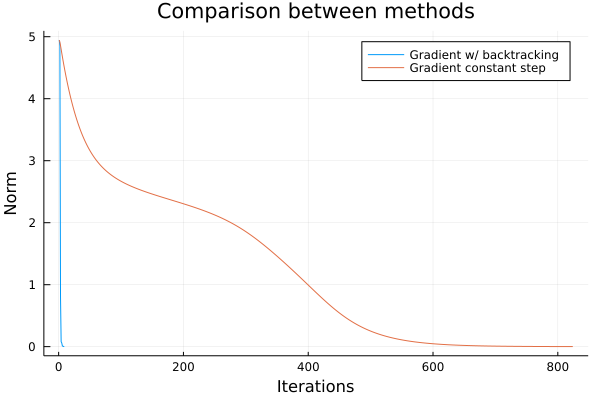

In [56]:
# Figure

plot([[norm(resu_grad[:,i]-opt) for i=1:size(resu_grad,2)] , [norm(resu_const[:,i]-opt) for i=1:size(resu_const,2)]], 
    title="Comparison between methods",
    label=["Gradient w/ backtracking" "Gradient constant step"])
xlabel!("Iterations")
ylabel!("Norm")

### <span style="color:#00B8DE"> III - Gradient and Newton </span>

In [57]:
function ∇2f(x)
    return [2*sin(x[2]-1)^2+2 4*(x[1]-2)cos(x[2]-1)*sin(x[2]-1);4*cos(x[2]-1)*sin(x[2]-1)*(x[1]-2) -2(x[1]-2)^2*sin(x[2]-1)^2+2*(x[1]-2)^2*cos(x[2]-1)^2+2]
end

∇2f (generic function with 1 method)

In [58]:
# Newton algorithm (with backtracking)
############################################################
init      = [-4,-2]
precision = 1.e-3
max_iter  = 1e4

pt        = init
nb_iter   = 0        # number of loops
nb_loops  = 0        # number of inner loops count for backtracking


function grad_newton(init, ∇f, ∇2f, precision, max_iter, opt)
    nb_iter = 0 # number of loops
    nb_loops = 0 # number of inner loops count for backtracking
    pt = init 
    result_ = pt
    
    while norm(pt-opt)>precision && nb_iter<max_iter

        d = - inv( ∇2f(pt) ) * ∇f(pt)
        r,nb_loops = backtracking(pt,f,∇f,d)
        pt += r * d

        nb_iter += 1
        nb_loops += nb_iter
        result_ = [result_ pt]
    end
    
    return pt, nb_iter, nb_loops, result_
end

pt, nb_iter, nb_loops, resu_N = grad_newton(init,  ∇f, ∇2f, precision, max_iter, opt)


([0.09172736480043805, 0.7789600053288204], 8, 8, [-4.0 0.22651953486828624 … 0.08821901467129997 0.09172736480043805; -2.0 -1.8859518489954588 … 0.7795474696105607 0.7789600053288204])

In [59]:
println("Error with Newton+backtracking: $(norm(resu_N[:,end]-opt))")
println("Number of iterations for Newton= $nb_iter")
println("Nnumber of inner loops for Newton = $nb_loops")

Error with Newton+backtracking: 1.5163068773622547e-6
Number of iterations for Newton= 8
Nnumber of inner loops for Newton = 8


 This is coherente with the theory seen in class, the Newton methode takes the same amount of iterations (8) to converge even when compared to the gradient with backtracking but gets better results. Moreover, this methode implies that the algorithm will invert the Hessian matrix. In this case that was not a problem but if the function was more complex and had more dimensions this could mean we can not use this methode. 

In [60]:
using LinearAlgebra: eigvals
println(eigvals(∇2f(pt)))

[1.7083242419930267, 8.970659789166492]


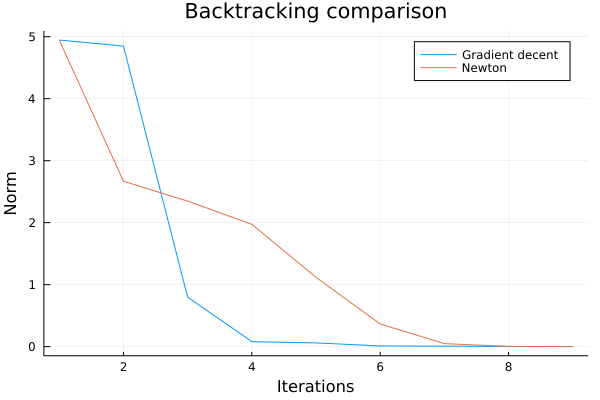

In [61]:
# Figure: gradient and Newton with backtracking

plot([[norm(resu_grad[:,i]-opt) for i=1:size(resu_grad,2)] , [norm(resu_N[:,i]-opt) for i=1:size(resu_N,2)]], 
    title="Backtracking comparison",
    label=["Gradient decent" "Newton"])

xlabel!("Iterations")
ylabel!("Norm")

### <span style="color:#00B8DE"> IV - Conjugate gradient </span>

In [62]:
using LinearAlgebra: norm

A=[1 0;0 5]
b=[1,1]
p(x)  = 0.5*transpose(x)*A*x-transpose(x)*b #p(x,y)
∇p(x) = A*x-b #∇p(x,y) = ...
opt= [1,1/5] #x=1, 5y=1

2-element Vector{Float64}:
 1.0
 0.2

In [63]:
precision = 1.e-8
max_iter  = 10e4
init      = [-2,3]

# optimal stepsize
function opt_grad(init, p, ∇p, precision, max_iter, opt,A,b)
    pt            = init
    nb_opt_grad   = 0 # number of loops
    resu_opt_grad = pt
    d=-∇p(pt) #d0
    g=∇p(pt) #g0
    while norm(pt-opt)>precision && nb_opt_grad<max_iter 
        a=-(transpose(g)*d)/(transpose(d) * A * d) 
        pt = pt + a * d #This I can calculate with the elements of the previous iteration
        g=∇p(pt) #gK+1
        B=(transpose(g)*A*d)/(transpose(d)*A*d) #Bk
        d=-g+B*d #dK+1
        nb_opt_grad+=1    
        resu_opt_grad = [resu_opt_grad pt]
        
    end
    return pt, nb_opt_grad, resu_opt_grad
end

pt, nb_opt_grad, resu_opt_grad=opt_grad(init, p, ∇p, precision, max_iter, opt,A,b)


([1.0000000000000004, 0.19999999999999996], 2, [-2.0 -1.378159757330637 1.0000000000000004; 3.0 0.09807886754297268 0.19999999999999996])

In [64]:

println("Error with gradient with optimal stepsize: $(norm(resu_opt_grad[:,end]-opt))")
println("Number of iterations = $nb_opt_grad")

Error with gradient with optimal stepsize: 4.47545209131181e-16
Number of iterations = 2


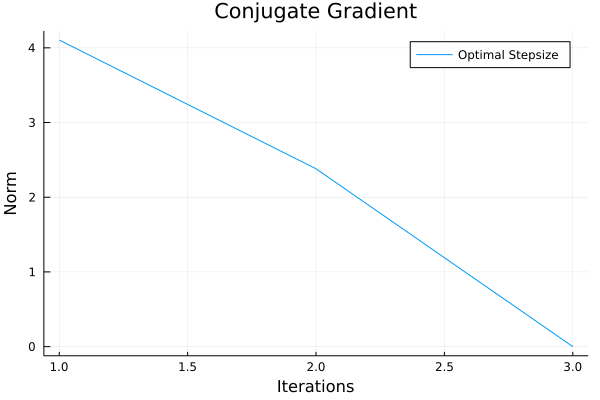

In [65]:
# For options of Plots.jl, see https://docs.juliaplots.org/latest/
using Plots
plot([norm(resu_opt_grad[:,i]-opt) for i=1:size(resu_opt_grad,2)], title="Conjugate Gradient",
    label="Optimal Stepsize")

xlabel!("Iterations")
ylabel!("Norm")

In [66]:
# Conjugate gradient
#--------------------
function conj_grad_backtracking(init, p, ∇p, precision, max_iter, opt,A,b)
   
    pt = init
    
    nb_iter_CG  = 0        # number of iterations
    nb_loops_CG = 0        # number of inner loops count for backtracking
    resu_CG=pt
    err_CG      = norm(pt-opt)
    
    # initialization
    d=-∇p(pt) #d0
    g=∇p(pt) #g0   
                
    # iterations
    while norm(pt-opt)>precision && nb_iter_CG<max_iter 
        a,nb_loops_CG=backtracking(pt,p,∇p,d) #we calculate via backtracking the coefficient a/ pt=a*d
        pt = pt + a * d #This I can calculate with the elements of the previous iteration
        g=∇p(pt) #gK+1
        B=(transpose(g)*A*d)/(transpose(d)*A*d) #Bk
        d=-g+B*d #dK+1
        nb_iter_CG+=1  
        nb_loops_CG+=nb_loops_CG
        resu_CG = [resu_CG pt]
       err_CG = [err_CG norm(pt-opt)]
    end
    return pt, nb_iter_CG, resu_CG,err_CG
end

pt, nb_iter_CG, resu_CG,err_CG=conj_grad_backtracking(init, p, ∇p, precision, max_iter, opt,A,b)

([1.00000000254529, 0.19999999806489724], 26, [-2.0 -1.25 … 0.9999999896973365 1.00000000254529; 3.0 -0.5 … 0.19999999751427067 0.19999999806489724], [4.1036569057366385 2.3563743335896357 … 1.0598288803902457e-8 3.197362008922496e-9])

In [67]:
println("Error with CG: $(err_CG[end])")
println("Error number of iterations with CG: $(size(resu_CG)[2])")

Error with CG: 3.197362008922496e-9
Error number of iterations with CG: 27


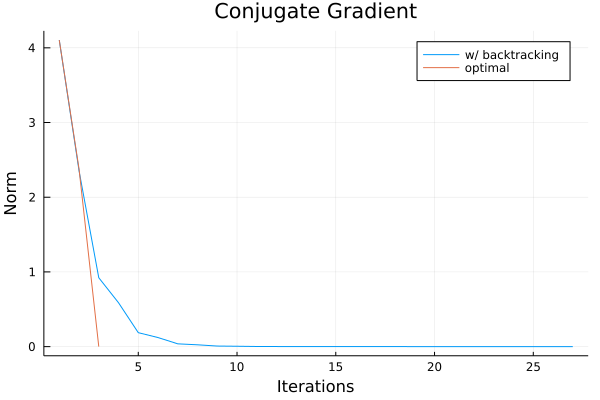

In [68]:
# Figure: gradient with optimal step

plot([[norm(resu_CG[:,i]-opt) for i=1:size(resu_CG,2)] , [norm(resu_opt_grad[:,i]-opt) for i=1:size(resu_opt_grad,2)]], 
    title="Conjugate Gradient",
    label=["w/ backtracking" "optimal" ])
xlabel!("Iterations")
ylabel!("Norm")

With the optimal step size, the method converges in only 2 steps. This result shows how backtracking, even converging much faster than a constant step size, it is not close to the minimum number of iterations

### A larger problem

In [69]:
using LinearAlgebra: cond, diagm
#With ones in the diagonal
#n=100
n = 100
A = randn(n,n)
A = A'*A + diagm(0=>ones(n)) #With ones in the matrix, it is faster to work with
b = randn(n)
p(x)  = 0.5*transpose(x)*A*x-transpose(x)*b #p(x,y)
∇p(x) = A*x-b #∇p(x,y) = ...
opt = inv(A)*b
pt          = randn(n)
err_CG      = norm(pt.-opt)
init= pt
#plot(err_CG/norm(opt),yscale=:log10,label="error norm of CG",size=(400,300))
pt, nb_opt_grad, resu_opt_grad=opt_grad(init, p, ∇p, precision, max_iter, opt,A,b)
print(" n= ")
print(100)
print(" diagonal_ones= ")
print(" True ")
print(" condition number of A= ")
print(cond(A))
print(" Convergence in steps= ")
print(nb_opt_grad)
println()

# ############################################################################################################
using LinearAlgebra: cond, diagm
#With ones in the diagonal
#n=100
n = 100
A = randn(n,n)
A = A'*A  #Without ones in the matrix, it is faster to work with
b = randn(n)
p(x)  = 0.5*transpose(x)*A*x-transpose(x)*b #p(x,y)
∇p(x) = A*x-b #∇p(x,y) = ...
opt = inv(A)*b
pt          = randn(n)
err_CG      = norm(pt.-opt)
init= pt
#plot(err_CG/norm(opt),yscale=:log10,label="error norm of CG",size=(400,300))
pt, nb_opt_grad, resu_opt_grad=opt_grad(init, p, ∇p, precision, max_iter, opt,A,b)
print(" n= ")
print(100)
print(" diagonal_ones= ")
print(" False ")
print(" condition number of A= ")
print(cond(A))
print(" Convergence in steps= ")
print(nb_opt_grad)
println()
# ############################################################################################################
using LinearAlgebra: cond, diagm
#With ones in the diagonal
#n=100
n = 10
A = randn(n,n)
A = A'*A + diagm(0=>ones(n)) #With ones in the matrix, it is faster to work with
b = randn(n)
p(x)  = 0.5*transpose(x)*A*x-transpose(x)*b #p(x,y)
∇p(x) = A*x-b #∇p(x,y) = ...
opt = inv(A)*b
pt          = randn(n)
err_CG      = norm(pt.-opt)
init= pt
#plot(err_CG/norm(opt),yscale=:log10,label="error norm of CG",size=(400,300))
pt, nb_opt_grad, resu_opt_grad=opt_grad(init, p, ∇p, precision, max_iter, opt,A,b)
print(" n= ")
print(10)
print(" diagonal_ones= ")
print(" True ")
print(" condition number of A= ")
print(cond(A))
print(" Convergence in steps= ")
print(nb_opt_grad)
println()

# ############################################################################################################
using LinearAlgebra: cond, diagm
#With ones in the diagonal
#n=100
n = 10
A = randn(n,n)
A = A'*A  #Without ones in the matrix, it is faster to work with
b = randn(n)
p(x)  = 0.5*transpose(x)*A*x-transpose(x)*b #p(x,y)
∇p(x) = A*x-b #∇p(x,y) = ...
opt = inv(A)*b
pt          = randn(n)
err_CG      = norm(pt.-opt)
init= pt
#plot(err_CG/norm(opt),yscale=:log10,label="error norm of CG",size=(400,300))
pt, nb_opt_grad, resu_opt_grad=opt_grad(init, p, ∇p, precision, max_iter, opt,A,b)
print(" n= ")
print(10)
print(" diagonal_ones= ")
print(" False ")
print(" condition number of A= ")
print(cond(A))
print(" Convergence in steps= ")
print(nb_opt_grad)
println()
# ############################################################################################################


 n= 100 diagonal_ones=  True  condition number of A= 397.9867244289262 Convergence in steps= 143
 n= 100 diagonal_ones=  False  condition number of A= 35723.05266213344 Convergence in steps= 162
 n= 10 diagonal_ones=  True  condition number of A= 28.38276943052066 Convergence in steps= 10
 n= 10 diagonal_ones=  False  condition number of A= 10866.914981789978 Convergence in steps= 10


The smaller the matrix, the faster this method will converge. Additionally, more diagonal matrices allow for faster convergence.

### <span style="color:#00B8DE"> V - Polak-Ribière </span>

#### <span style="color:#00B8DE">Polack-Ribière method</span>

Initialization: 

> 1. initialize ${\bf x_0}$ and calculate $\Delta {\bf x_0}$, where $\Delta {\bf x_n}= - \nabla f ({\bf x_n})$ 
> 2. $\alpha_0 = \arg \min_\alpha f({\bf x_0}+\alpha \Delta {\bf x_0})$
> 3. ${\bf x_1}={\bf x_0}+\alpha_0 \Delta {\bf x_0}$

Iterations: 

> 1. $\beta_{n} = \frac{\nabla f ({\bf x_n})^{\top} (\nabla f ( {\bf x_n})-\nabla f ({\bf x_{n-1}}))} {\nabla f ({\bf x_{n-1})^{\top}} \nabla f ({\bf x_{n-1}})}$
> 2. ${\bf d_n}= -\nabla f ({\bf x_n})+\beta_n {\bf d_{n-1}}$
> 3. $\alpha_n=\arg \min_{\alpha} f({\bf x_n}+\alpha {\bf d_n})$
> 4. ${\bf x_{n+1}}={\bf x_n}+\alpha_{n} {\bf d_n}$


In [70]:
# Polak-Ribière
#---------------

function grad_polak_ribiere(init,f, ∇f, precision, max_iter, opt)
    # initialization
    nb_iter_PR  = 0        # number of iterations
    nb_loops_PR = 0        # number of inner loops count for backtracking

    
    xn = init
    Δxn = -∇f(xn)
    
    dn = Δxn
    alpha_pr, n_back_pr = backtracking(xn, f, ∇f, Δxn)
    xn = xn + alpha_pr * Δxn
    
    nb_loops_PR = n_back_pr
    resu_PR = xn
    
    while norm(xn-opt)>precision&&nb_iter_PR<max_iter
        
        Δxn_old = Δxn
        Δxn = -∇f(xn)
        beta = (transpose(Δxn) * (Δxn - Δxn_old)) / (transpose(Δxn_old) * Δxn_old)
        dn = Δxn + beta * dn
        alpha_pr, n_back_pr = backtracking(xn, f, ∇f, dn)

        xn = xn + alpha_pr * dn

        nb_iter_PR += 1
        nb_loops_PR += n_back_pr
        resu_PR = [resu_PR xn]
    end
    
    return xn, nb_iter_PR, nb_loops_PR, resu_PR
end



grad_polak_ribiere (generic function with 1 method)

In [71]:
precision = 1.e-3
max_iter  = 1e4
opt = [0.09172811859570773;0.7789586896619789]
init = [-4, -2]
pt, nb_iter_PR, nb_loops_PR, resu_PR = grad_polak_ribiere(init, f, ∇f, precision, max_iter, opt)


([0.09109702421358706, 0.7789058777602594], 14, 123, [-3.742531928746944 0.0398849362807443 … 0.09056300443423897 0.09109702421358706; -2.1893424354737916 -1.7092056741711892 … 0.7794272019563627 0.7789058777602594])

In [72]:
println("Error with gradient = $(norm(resu_grad[:,end]-opt))")
println("Number of iterations = $nb_iter_grad")
println("Number of inner loops = $nb_loops_grad\n")

println("Error with Polack-Ribière = $(norm(resu_PR[:,end]-opt))")
println("Number of iterations = $nb_iter_PR")
println("Number of inner loops = $nb_loops_PR")

Error with gradient = 0.0008575056646528278
Number of iterations = 8
Number of inner loops = 20

Error with Polack-Ribière = 0.0006333002574667824
Number of iterations = 14
Number of inner loops = 123


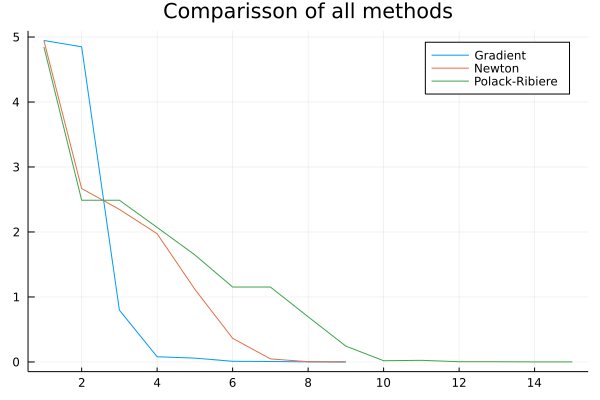

In [73]:
#Figure: Gradient and Polack-Ribière (with backtraking)
plot([[norm(resu_grad[:,i]-opt) for i=1:size(resu_grad,2)] ,[norm(resu_N[:,i]-opt) for i=1:size(resu_N,2)], [norm(resu_PR[:,i]-opt) for i=1:size(resu_PR,2)]],
    title="Comparisson of all methods",
    label=["Gradient" "Newton"  "Polack-Ribiere"])


We can see in this condition thatit seems that the PR method is worst than the others, at least it takes more iterations to converge. But redoing this test we saw that this deppends on the alpha and beta we choose to do the backtracking: 

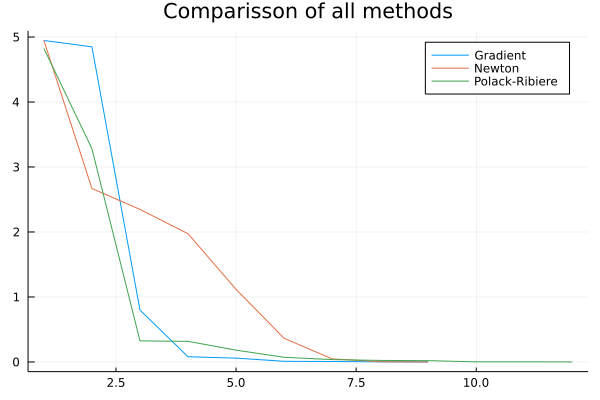

In [74]:
function backtracking(x,f,∇f,d)
# x[1]=x x[2]=y
    a = 0.25 #is a value between (0 and 0.5)
    b = 0.7  #is a value between (0 and 1)
    r = 1
    n = 0

    
    while f( x+r * d) > f(x) + a * r * (transpose(d) * ∇f(x))
        r = b * r
        n += 1
    end
    
    return r, n
end
precision = 1.e-3
max_iter  = 1e4
opt = [0.09172811859570773;0.7789586896619789]
init = [-4, -2]
pt, nb_iter_PR, nb_loops_PR, resu_PR = grad_polak_ribiere(init, f, ∇f, precision, max_iter, opt)

#Figure: Gradient and Polack-Ribière (with backtraking)
plot([[norm(resu_grad[:,i]-opt) for i=1:size(resu_grad,2)] ,[norm(resu_N[:,i]-opt) for i=1:size(resu_N,2)], [norm(resu_PR[:,i]-opt) for i=1:size(resu_PR,2)]],
    title="Comparisson of all methods",
    label=["Gradient" "Newton"  "Polack-Ribiere"])

In this graph we can see that thePR method requires less iterations to get a a smaller difference but still converges almost at the same time that the other methods. What is interesting for us to see is the strong dependece of the PR in the bakctracking parameters. 

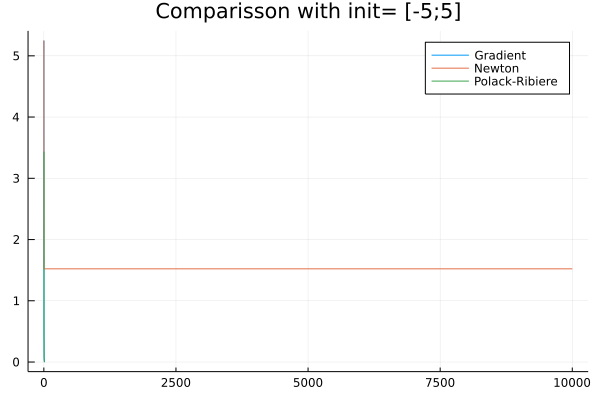

In [75]:
init = [-5;-.5]

pt, nb_iter_grad, nb_loops_grad, resu_grad = grad_descent_backtracking(init, f, ∇f, precision, max_iter, opt)

pt, nb_iter, nb_loops, resu_N = grad_newton(init,  ∇f, ∇2f, precision, max_iter, opt)

pt, nb_iter_PR, nb_loops_PR, resu_PR = grad_polak_ribiere(init, f, ∇f, precision, max_iter, opt)

plot([[norm(resu_grad[:,i]-opt) for i=1:size(resu_grad,2)] ,[norm(resu_N[:,i]-opt) for i=1:size(resu_N,2)], [norm(resu_PR[:,i]-opt) for i=1:size(resu_PR,2)]],
    title="Comparisson with init= [-5;5]",
    label=["Gradient" "Newton"  "Polack-Ribiere"])


In this graph we cans see that changeing the starting point to [-5,-.5] really affected the Newton method, making it converge to anoter point. We will plot only the other two methods to see how it affected them: 

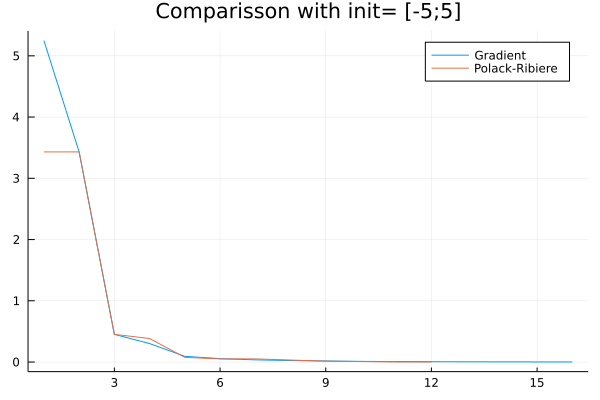

In [76]:
plot([[norm(resu_grad[:,i]-opt) for i=1:size(resu_grad,2)], [norm(resu_PR[:,i]-opt) for i=1:size(resu_PR,2)]],
    title="Comparisson with init= [-5;5]",
    label=["Gradient"  "Polack-Ribiere"])

We cans see that changeing the starting point has helped these 2 methods to converge in less iterations. Also it made them have a plot really similar. It stays the samt the fact that both methos converge in a similar point. 